In [1]:
#importing modules
import pandas as pd 

import matplotlib.pyplot as plt

import matplotlib.ticker as ticker

import seaborn as sns 

from scipy.optimize import curve_fit 

from scipy.stats import norm as norm

from scipy.stats import ttest_ind as ttest

import numpy as np 

In [2]:
#defining useful functions 

# defining the fitting function 
def Linear(x,m,b):
    
    return m * x + b

# defining a function to calculate the mean absolute error 
def calculate_mae(y_true, y_pred):

    mae = np.mean(np.abs(y_true - y_pred))
    
    return mae

def twoSampZ(X1, X2, mudiff, sd1, sd2, n1, n2):
    
    pooledSE = np.sqrt(sd1**2/n1 + sd2**2/n2)
    
    z = ((X1 - X2) - mudiff)/pooledSE
    
    pval = 2*(norm.sf(abs(z)))
    
    return round(z, 3), round(pval, 4)

In [3]:
#loading in the student performance data 
student_data = pd.read_csv('StudentsPerformance.csv')

In [4]:
standard_mask = student_data['lunch'] == 'standard'

reduced_mask = student_data['lunch'] == 'free/reduced'

standard_data = student_data[standard_mask]

reduced_data = student_data[reduced_mask]

Text(0.5, 1.0, 'Free/Reduced Lunch')

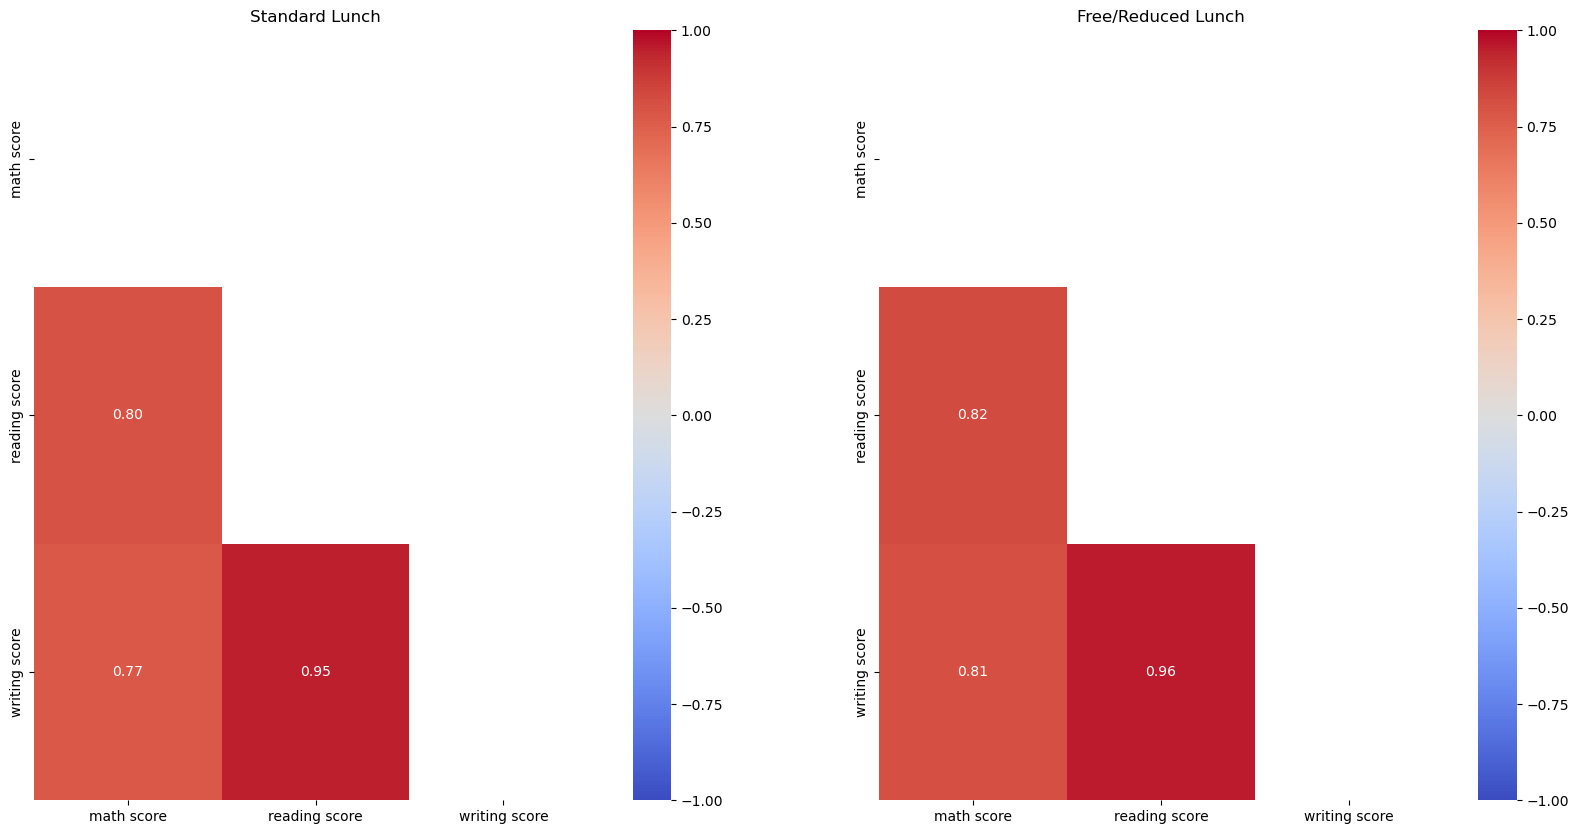

In [5]:
#getting correlation matrices for each of the lunch types in the dataset
standard_matrix = standard_data.corr(numeric_only=True)

reduced_matrix = reduced_data.corr(numeric_only=True)

#creating masks to only show the lower triangle of each matrix
standard_mask = np.triu(np.ones_like(standard_matrix, dtype=bool))

reduced_mask = np.triu(np.ones_like(reduced_matrix, dtype=bool))

#initializing figure to plot the matrices
fig, axs = plt.subplots(ncols=2,figsize=(20, 10))

#plotting correlation matrix for each of the ethnic groups 
sns.heatmap(standard_matrix, annot=True, vmin = -1, vmax = 1, fmt=".2f", cmap='coolwarm', mask=standard_mask, ax=axs[0])

sns.heatmap(reduced_matrix, annot=True, vmin = -1, vmax = 1, fmt=".2f", cmap='coolwarm', mask=reduced_mask, ax=axs[1])

#setting the title of each of the subplots 
axs[0].set_title('Standard Lunch')

axs[1].set_title('Free/Reduced Lunch')

/Users/trentonsmiley/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x1000 with 0 Axes>

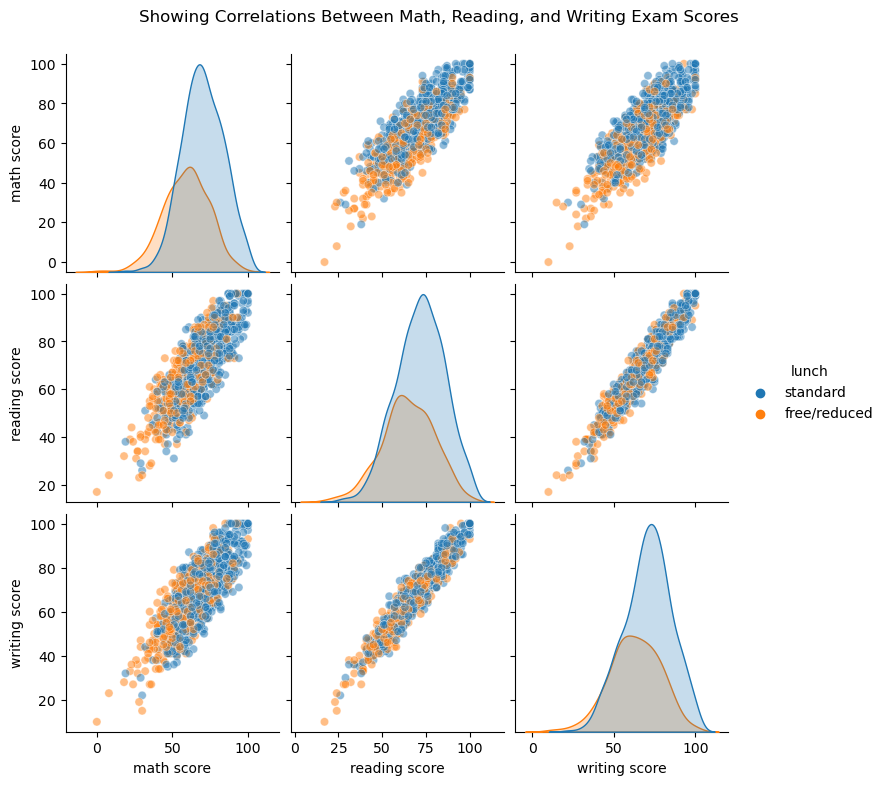

In [6]:
#recreating the numerical dataframe of the original student data
numerical_df = student_data.drop([i for i in student_data.columns if i not in ['math score','reading score','writing score','lunch']],axis=1)

#calling the figure constructer and setting figure size 
fig = plt.figure(figsize=(10,10))

#making a seaborn pairplot of the columns and calling parameters to customize it 
#this time we use the hue parameter to separate the data by lunch type
g = sns.pairplot(numerical_df,hue='lunch',diag_kind='kde',plot_kws={'color':'teal','alpha':0.5},diag_kws={'fill':True,'color':'teal'})

#setting the title of the figure
g.fig.suptitle('Showing Correlations Between Math, Reading, and Writing Exam Scores',y=1.04)

#saving the plot to files 
plt.savefig('Lunch Correlation.png')

In [7]:
standard_math_scores, standard_reading_scores, standard_writing_scores = standard_data['math score'], standard_data['reading score'], standard_data['writing score']

reduced_math_scores, reduced_reading_scores, reduced_writing_scores = reduced_data['math score'], reduced_data['reading score'], reduced_data['writing score']

#finding the linear parameters of the standard writing v. math regression line
standard_math_writing_parameters, _ = curve_fit(Linear,standard_math_scores,standard_writing_scores)

#finding the linear parameters of the standard math v. reading regression line  
standard_reading_math_parameters, _ = curve_fit(Linear,standard_reading_scores,standard_math_scores)

#finding the linear parameters of the standard reading v. writing regression line 
standard_writing_reading_parameters, _ = curve_fit(Linear,standard_writing_scores,standard_reading_scores)

#using the standard writing v. math parameters with the linear model to find the expected standard writing scores 
standard_expected_writing_scores = Linear(standard_math_scores,standard_math_writing_parameters[0],standard_math_writing_parameters[1])

#using the standard math v. reading parameters with the linear model to find the expected standard math scores 
standard_expected_math_scores = Linear(standard_reading_scores,standard_reading_math_parameters[0],standard_reading_math_parameters[1])

#using the standard reading v. writing parameters with the linear model to find the expected standard reading scores 
standard_expected_reading_scores = Linear(standard_writing_scores,standard_writing_reading_parameters[0],standard_writing_reading_parameters[1])

#finding the linear parameters of the reduced writing v. math regression line 
reduced_math_writing_parameters, _ = curve_fit(Linear,reduced_math_scores,reduced_writing_scores)

#finding the linear parameters of the reduced math v. reading regression line 
reduced_reading_math_parameters, _ = curve_fit(Linear,reduced_reading_scores,reduced_math_scores)

#finding the linear parameters of the reduced reading v. writing regression line 
reduced_writing_reading_parameters, _ = curve_fit(Linear,reduced_writing_scores,reduced_reading_scores)

#using the reduced writing v. math parameters with the linear model to find the expected reduced writing scores 
reduced_expected_writing_scores = Linear(reduced_math_scores,reduced_math_writing_parameters[0],reduced_math_writing_parameters[1])

#using the reduced math v. reading parameters with the linear model to find the expected reduced math scores
reduced_expected_math_scores = Linear(reduced_reading_scores,reduced_reading_math_parameters[0],reduced_reading_math_parameters[1])

#using the reduced reading v. writing parameters with the linear model to find the expected reduced reading scores
reduced_expected_reading_scores = Linear(reduced_writing_scores,reduced_writing_reading_parameters[0],reduced_writing_reading_parameters[1])

Text(0.5, 0.94, 'Test Score Correlation Differences Between Lunch Types')

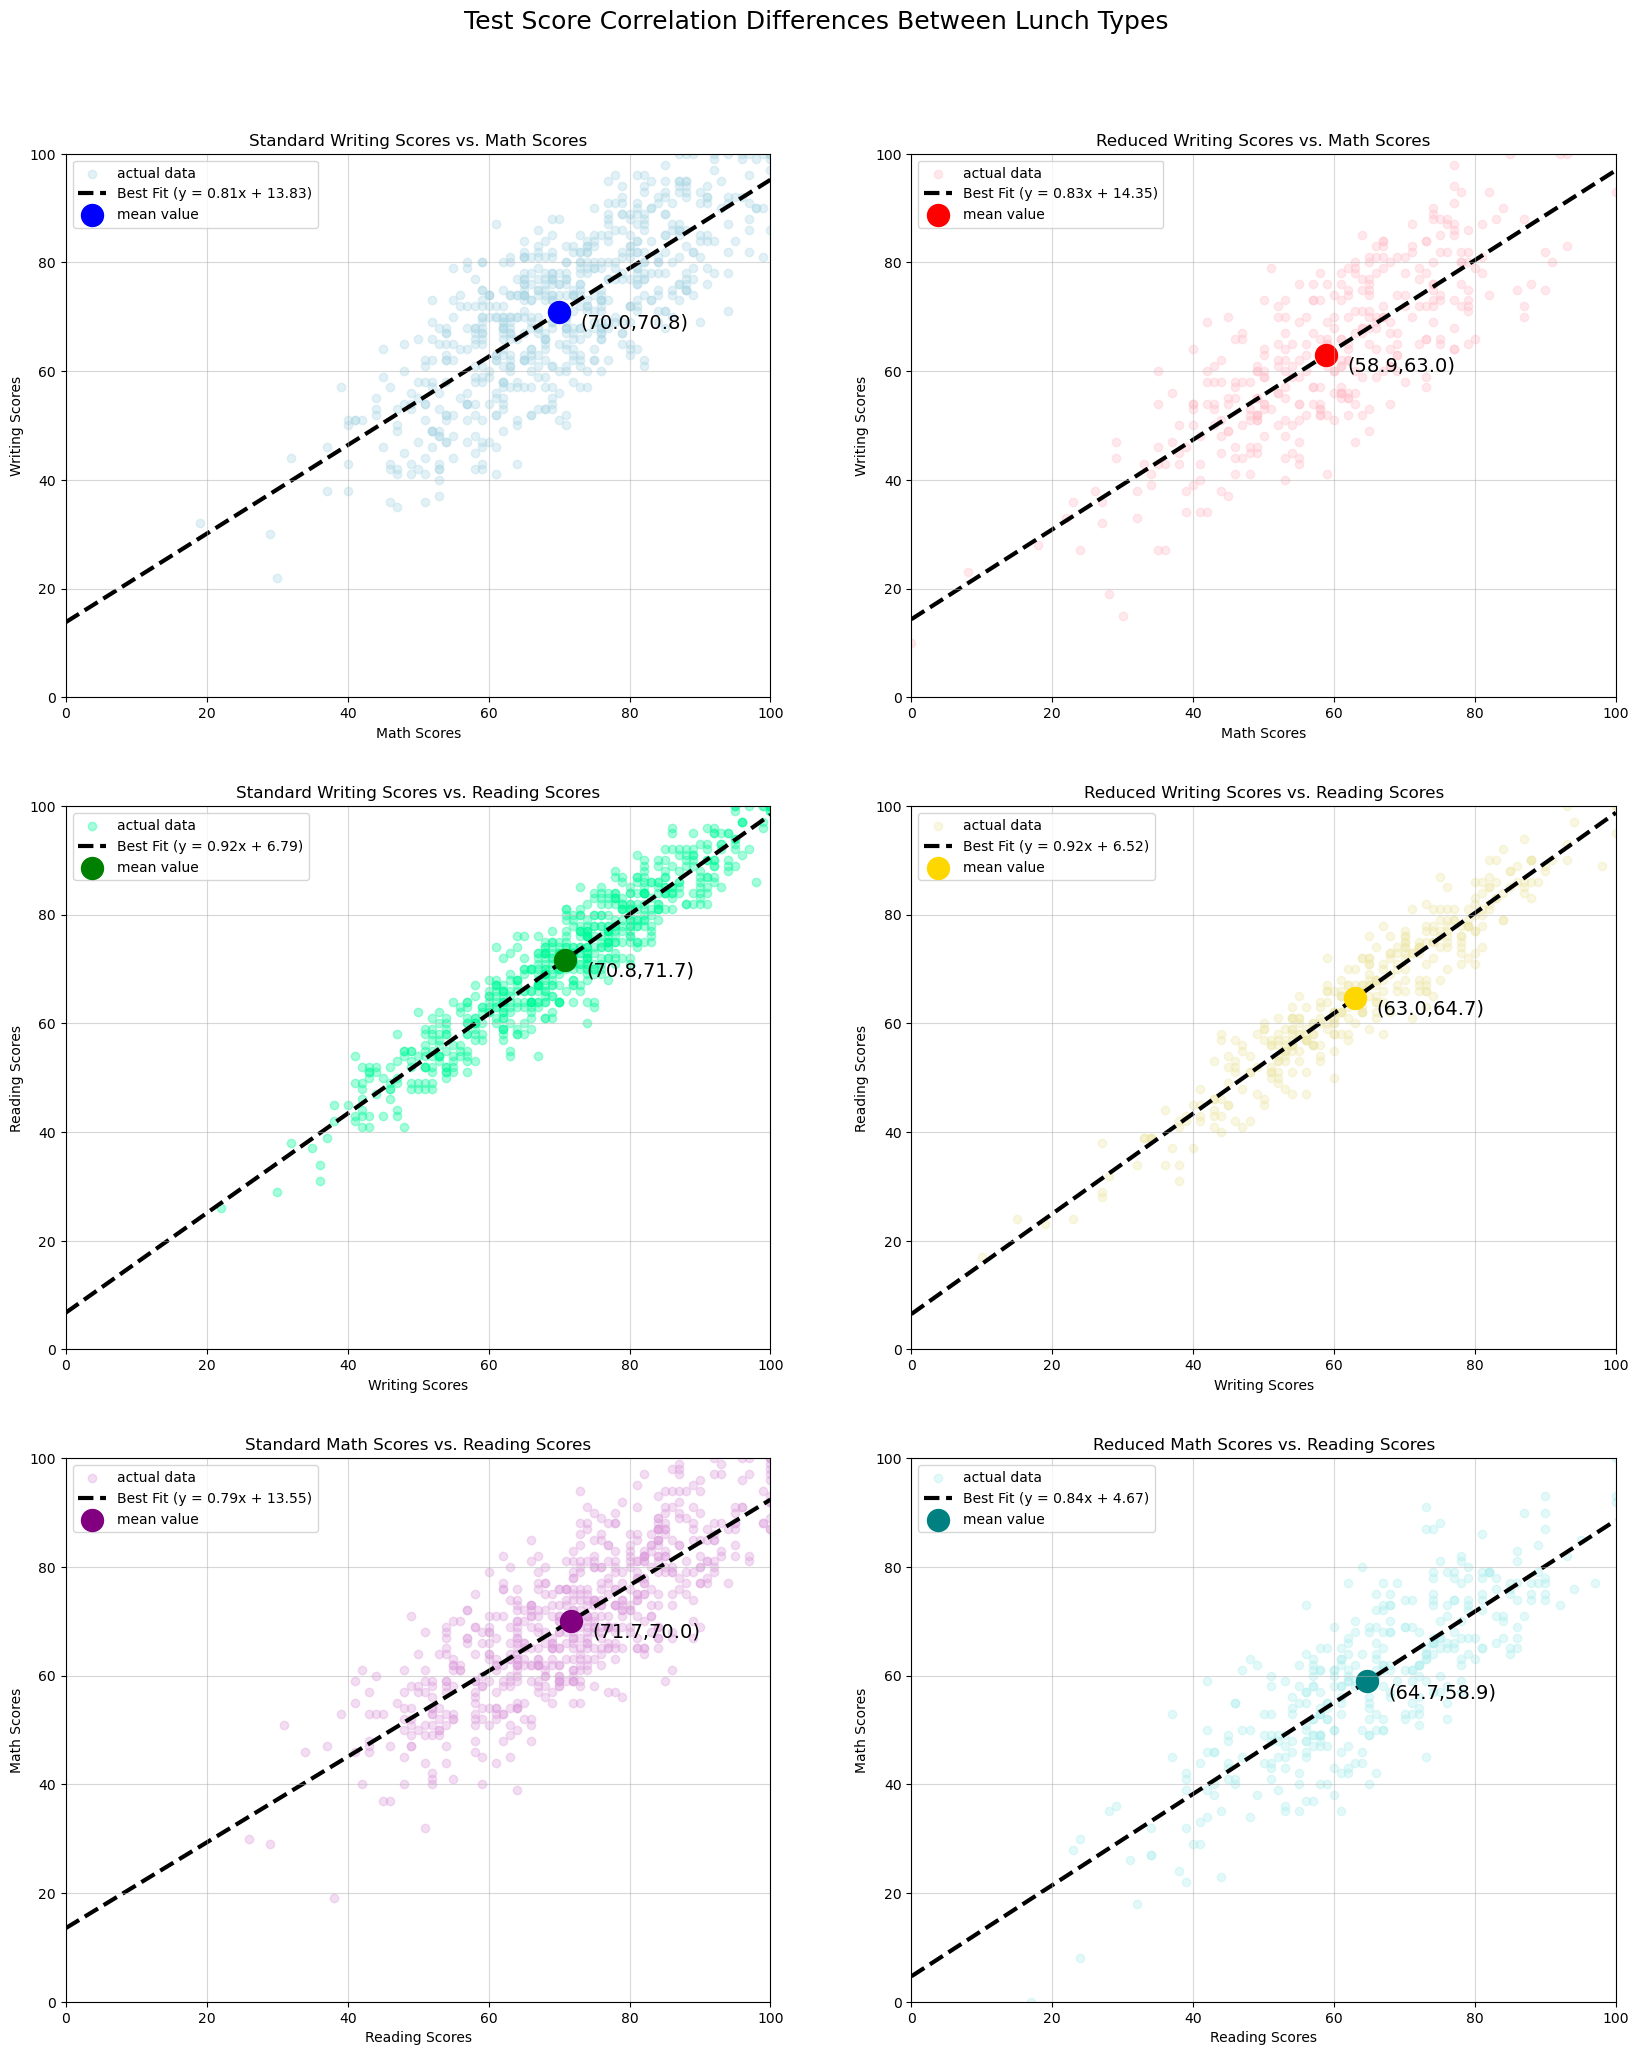

In [8]:
fig, axs = plt.subplots(ncols=2,nrows=3,figsize=(20, 24))

#initializing a list of 3 sublists where each sublist contains the respective standard and reduced x axis data for 
#each row of subplots
xs = [[standard_math_scores,reduced_math_scores],[standard_writing_scores,reduced_writing_scores],[standard_reading_scores,reduced_reading_scores]]

#initializing a list of 3 sublists where each sublist contains the respective standard and reduced y axis data for 
#each row of the subplots
ys = [[standard_writing_scores,reduced_writing_scores],[standard_reading_scores,reduced_reading_scores],[standard_math_scores,reduced_math_scores]]

#initializing a list of 3 sublists where each sublist contians the respective standard and reduced linear regression
#parameters for each row of the subplots 
para = [[standard_math_writing_parameters,reduced_math_writing_parameters],[standard_writing_reading_parameters,reduced_writing_reading_parameters],[standard_reading_math_parameters,reduced_reading_math_parameters]]

#initializing a list of 3 sublists where each sublist contains the respective standard and reduced subplot title
#for each row of the subplots
titles = [['Standard Writing Scores vs. Math Scores','Reduced Writing Scores vs. Math Scores'],['Standard Writing Scores vs. Reading Scores','Reduced Writing Scores vs. Reading Scores'],['Standard Math Scores vs. Reading Scores','Reduced Math Scores vs. Reading Scores']]

#initializng a list of 3 tuples where each tuples contains the axis labels for that row of subplots 
axs_labels = [('Math Scores','Writing Scores'),('Writing Scores','Reading Scores'),('Reading Scores','Math Scores')]

#initializing a list of 3 sublists where each sublist contains the respective standard and reduced mean value scatter 
#color for each row of the subplots
colors = [['blue','red'],['green','gold'],['purple','teal']]

#initializing a list of 3 sublists where each sublist contains the respective standard and reduced scatter point 
#color for each row of the subplots
scattercolors = [['lightblue','pink'],['mediumspringgreen','palegoldenrod'],['plum','paleturquoise']]

#iterating over i = 0,1,2 where each i is a row of subplots
for i in range(3):
    
    #iterating over j = 0,1 where each j is a column of suplots 
    for j in range(2):
        
        #plotting the respective scatter plot for each of the 6 subplots using the already initialized lists
        axs[i,j].scatter(xs[i][j],ys[i][j],color=scattercolors[i][j],alpha=.35,label='actual data',zorder=-20)
        
        #plotting the respective linear regression line for each of the 6 subplots using the already
        #initialized lists
        axs[i,j].plot([0,max(xs[i][j])],[para[i][j][1],Linear(max(xs[i][j]),para[i][j][0],para[i][j][1])],color='black',
                      linewidth=3,linestyle='dashed',zorder=-10,label=f'Best Fit (y = {round(para[i][j][0],2)}x + {round(para[i][j][1],2)})')
        
        #plotting (x_mean, y_mean) for each of the 6 suplots using the already initialized lists 
        axs[i,j].scatter(np.mean(xs[i][j]),np.mean(ys[i][j]),marker='.',s=1000,color=colors[i][j],zorder=0,label='mean value')

        #adding an annotation including the values of the (x_mean,y_mean) coordinate for each of the 6 suplots
        axs[i,j].annotate(f'({round(np.mean(xs[i][j]),1)},{round(np.mean(ys[i][j]),1)})',xy=(np.mean(xs[i][j])+3,np.mean(ys[i][j])-3),fontsize=14)

        #setting the title of all 6 of the subplots using the titles list
        axs[i,j].set_title(titles[i][j])
            
        #setting the x axis label of all 6 of the subplots using the axs_labels list
        axs[i,j].set_xlabel(axs_labels[i][0]) 

        #setting the y axis label of all 6 of the subplots using the axs_labels list
        axs[i,j].set_ylabel(axs_labels[i][1]) 
           
        #setting a uniform x limit across all 6 of the subplots 
        axs[i,j].set_xlim(0,100)
    
        #setting a uniform y limit across all 6 of the subplots 
        axs[i,j].set_ylim(0,100)
    
        #initialzing a legend for each of the 6 subplots 
        axs[i,j].legend()
        
        #initializng a grid for each of the 6 subplots
        axs[i,j].grid(alpha=.5)

#setting the figure super title 
fig.suptitle('Test Score Correlation Differences Between Lunch Types',y=.94,fontsize=18)

In [9]:
#initializing variables for the number of students that belong to each of the ethnicity groups 
n_standard, n_reduced, = len(standard_data), len(reduced_data) 

#initializing variables that hold the respective subject mean scores for each of the ethnicity groups 
standard_math_mean, standard_reading_mean, standard_writing_mean = np.mean(standard_math_scores), np.mean(standard_reading_scores), np.mean(standard_writing_scores)

reduced_math_mean, reduced_reading_mean, reduced_writing_mean = np.mean(reduced_math_scores), np.mean(reduced_reading_scores), np.mean(reduced_writing_scores)

#initializing variables that hold the respective subject standard deviation of scores for each of the ethnicity groups
standard_math_std, standard_reading_std, standard_writing_std = np.std(standard_math_scores), np.std(standard_reading_scores), np.std(standard_writing_scores)

reduced_math_std, reduced_reading_std, reduced_writing_std = np.std(reduced_math_scores), np.std(reduced_reading_scores), np.std(reduced_writing_scores)

In [10]:
math_z, math_p = twoSampZ(standard_math_mean,reduced_math_mean,0,standard_math_std,reduced_math_std,n_standard,n_reduced)

reading_z, reading_p = twoSampZ(standard_reading_mean,reduced_reading_mean,0,standard_reading_std,reduced_reading_std,n_standard,n_reduced)

writing_z, writing_p = twoSampZ(standard_writing_mean,reduced_writing_mean,0,standard_writing_std,reduced_writing_std,n_standard,n_reduced)

print('Math:\n')

print(f'The z-score and p-value for the 2-sample Z-test between reduced and standard lunch groups is {math_z:.2f} and {math_p:.3g}.\n')

print('Reading:\n')

print(f'The z-score and p-value for the 2-sample Z-test between reduced and standard lunch groups is {reading_z:.2f} and {reading_p:.3g}.\n')

print('Writing:\n')

print(f'The z-score and p-value for the 2-sample Z-test between reduced and standard lunch groups is {writing_z:.2f} and {writing_p:.3g}.\n')

Math:

The z-score and p-value for the 2-sample Z-test between reduced and standard lunch groups is 11.50 and 0.

Reading:

The z-score and p-value for the 2-sample Z-test between reduced and standard lunch groups is 7.30 and 0.

Writing:

The z-score and p-value for the 2-sample Z-test between reduced and standard lunch groups is 7.85 and 0.



In [11]:
math_ttest = ttest(standard_math_scores, reduced_math_scores, equal_var = False)

math_t, math_tp, math_conf_interval = math_ttest.statistic, math_ttest.pvalue, math_ttest.confidence_interval(confidence_level=.9)

reading_ttest = ttest(standard_reading_scores, reduced_reading_scores, equal_var = False)  

reading_t, reading_tp, reading_conf_interval = reading_ttest.statistic, reading_ttest.pvalue, reading_ttest.confidence_interval(confidence_level=.9)

writing_ttest = ttest(standard_writing_scores, reduced_writing_scores, equal_var = False)  

writing_t, writing_tp, writing_conf_interval = writing_ttest.statistic, writing_ttest.pvalue, writing_ttest.confidence_interval(confidence_level=.9)

print('Standard vs. Reduced Lunch T-Test\n')

print('Math')

print(f't-statistic, p-value: {round(math_t,2)} & {math_tp:.3g}\n90% confidence interval:({math_conf_interval.low:.2f},{math_conf_interval.high:.2f})\n')

print('Reading')

print(f't-statistic, p-value: {round(reading_t,2)} & {reading_tp:.3g}\n90% confidence interval: ({reading_conf_interval.low:.2f},{reading_conf_interval.high:.2f})\n')

print('Writing')

print(f't-statistic, p-value: {round(writing_t,2)} & {writing_tp:.3g}\n90% confidence interval: ({writing_conf_interval.low:.2f},{writing_conf_interval.high:.2f})\n')


Standard vs. Reduced Lunch T-Test

Math
t-statistic, p-value: 11.48 & 5.54e-28
90% confidence interval:(9.52,12.71)

Reading
t-statistic, p-value: 7.29 & 8.42e-13
90% confidence interval: (5.42,8.58)

Writing
t-statistic, p-value: 7.84 & 1.72e-14
90% confidence interval: (6.16,9.44)



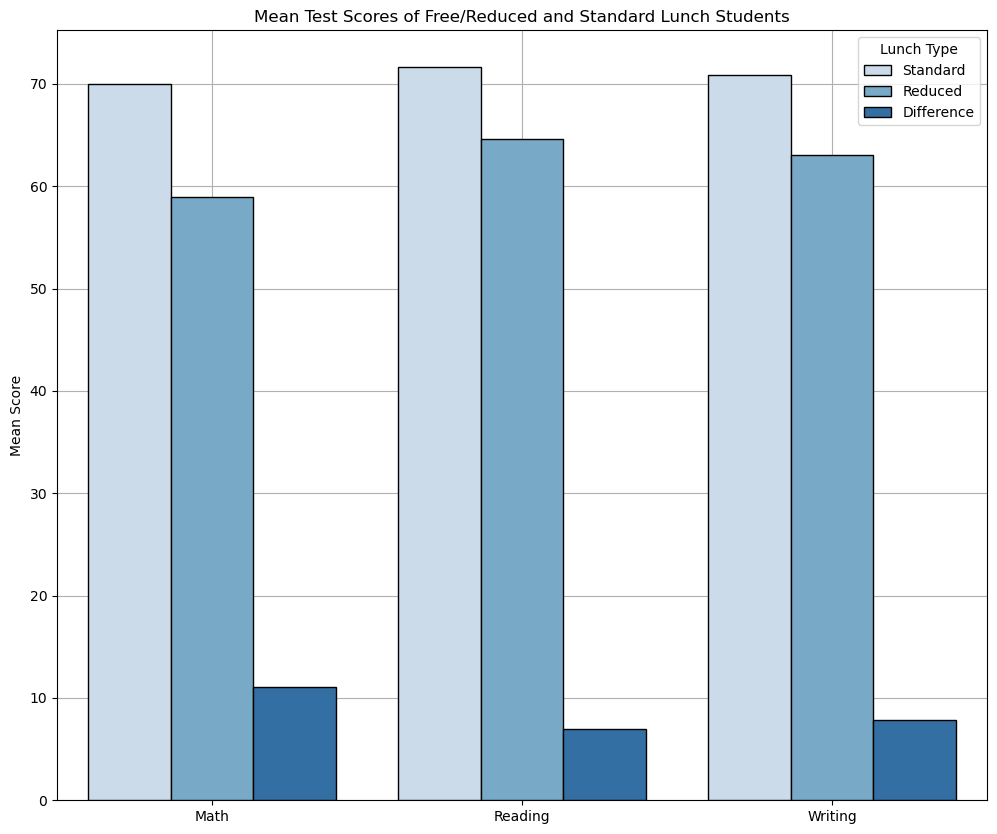

In [12]:
mean_score_df = pd.DataFrame(
    
    {
     
    'Subject' : ['Math','Math','Math','Reading','Reading','Reading','Writing','Writing','Writing'],
    
    'Lunch Type': ['Standard','Reduced','Difference','Standard','Reduced','Difference','Standard','Reduced','Difference'],
    
    'Mean Score': [standard_math_mean,reduced_math_mean,standard_math_mean - reduced_math_mean,standard_reading_mean,reduced_reading_mean,standard_reading_mean - reduced_reading_mean,standard_writing_mean,reduced_writing_mean,standard_writing_mean - reduced_writing_mean]
    
    }
    
)

fig, axs = plt.subplots(figsize=(12,10))

g = sns.barplot(data=mean_score_df,x='Subject',y='Mean Score',hue='Lunch Type',ax=axs,palette='Blues',edgecolor='black',zorder=20)

axs.set(xlabel=None,title='Mean Test Scores of Free/Reduced and Standard Lunch Students')

axs.grid()

In [13]:
education_lvls = list(student_data['parental level of education'].unique())

education_lvls.sort()

education_lvls

masks = [student_data['parental level of education']==i for i in education_lvls]

associates_data = 0

bachelors_data = 0 

highschool_data = 0

masters_data = 0 

somecollege_data = 0 

somehs_data = 0

datasets = [associates_data,bachelors_data,highschool_data,masters_data,somecollege_data,somehs_data]

for i in range(len(masks)):
    
    datasets[i] = student_data[masks[i]]

associates_data, bachelors_data, highschool_data, masters_data, somecollege_data, somehs_data = datasets 

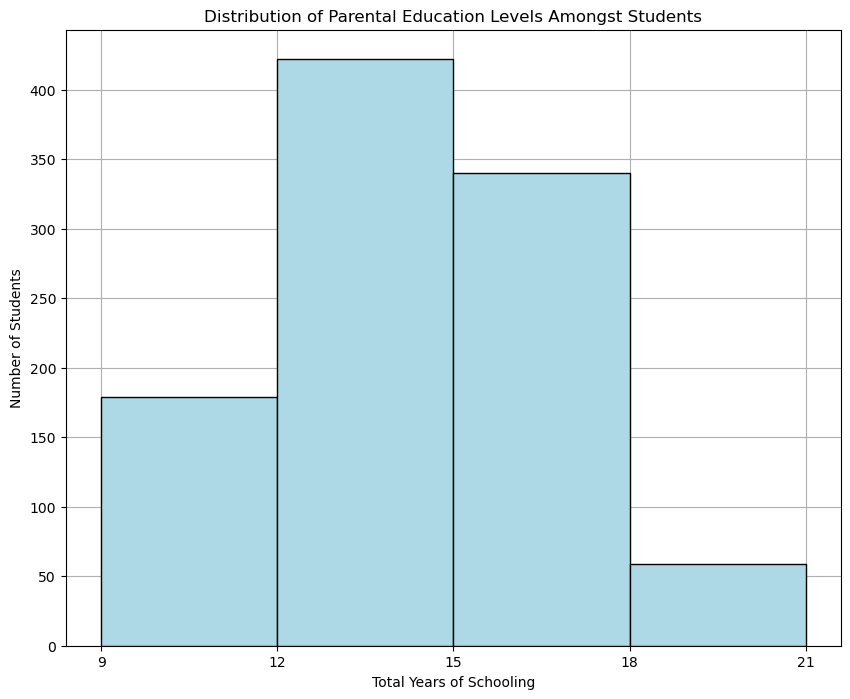

In [14]:
no_of_yrs = []

for i in student_data['parental level of education']:
    
    if 'associate' in i:
        
        no_of_yrs.append(15)
        
    elif 'bachelor' in i:
        
        no_of_yrs.append(17)
        
    elif 'master' in i:
        
        no_of_yrs.append(20)
        
    elif 'some college' in i:
        
        no_of_yrs.append(14)
        
    elif 'some high school' in i:
        
        no_of_yrs.append(11)
        
    elif 'high school' in i:
        
        no_of_yrs.append(13)

fig, axs = plt.subplots(figsize=(10,8))

axs.hist(no_of_yrs,bins=[9,12,15,18,21],color='lightblue',edgecolor='black',zorder=20)

axs.set_xticks(ticks=[9,12,15,18,21])

axs.set_xlabel('Total Years of Schooling')

axs.set_ylabel('Number of Students')

axs.set_title('Distribution of Parental Education Levels Amongst Students')

axs.grid()

In [15]:
#initializing variables that hold the respective subject scores for each of the ethnicity groups 
associates_math_scores, associates_reading_scores, associates_writing_scores = np.array(associates_data['math score']), np.array(associates_data['reading score']), np.array(associates_data['writing score'])

bachelors_math_scores, bachelors_reading_scores, bachelors_writing_scores = np.array(bachelors_data['math score']), np.array(bachelors_data['reading score']), np.array(bachelors_data['writing score'])

masters_math_scores, masters_reading_scores, masters_writing_scores = np.array(masters_data['math score']), np.array(masters_data['reading score']), np.array(masters_data['writing score'])

highschool_math_scores, highschool_reading_scores, highschool_writing_scores = np.array(highschool_data['math score']), np.array(highschool_data['reading score']), np.array(highschool_data['writing score'])

somecollege_math_scores, somecollege_reading_scores, somecollege_writing_scores = np.array(somecollege_data['math score']), np.array(somecollege_data['reading score']), np.array(somecollege_data['writing score'])

somehs_math_scores, somehs_reading_scores, somehs_writing_scores = np.array(somehs_data['math score']), np.array(somehs_data['reading score']), np.array(somehs_data['writing score'])

#initializing variables for the number of students that belong to each of the ethnicity groups 
n_associates, n_bachelors, n_masters, n_highschool, n_somecollege, n_somehs = len(associates_data), len(bachelors_data), len(masters_data), len(highschool_data), len(somecollege_data), len(somehs_data) 

#initializing variables that hold the respective subject mean scores for each of the ethnicity groups 
associates_math_mean, associates_reading_mean, associates_writing_mean = np.mean(associates_math_scores), np.mean(associates_reading_scores), np.mean(associates_writing_scores)

bachelors_math_mean, bachelors_reading_mean, bachelors_writing_mean = np.mean(bachelors_math_scores), np.mean(bachelors_reading_scores), np.mean(bachelors_writing_scores)

masters_math_mean, masters_reading_mean, masters_writing_mean = np.mean(masters_math_scores), np.mean(masters_reading_scores), np.mean(masters_writing_scores)

highschool_math_mean, highschool_reading_mean, highschool_writing_mean = np.mean(highschool_math_scores), np.mean(highschool_reading_scores), np.mean(highschool_writing_scores)

somecollege_math_mean, somecollege_reading_mean, somecollege_writing_mean = np.mean(somecollege_math_scores), np.mean(somecollege_reading_scores), np.mean(somecollege_writing_scores)

somehs_math_mean, somehs_reading_mean, somehs_writing_mean = np.mean(somehs_math_scores), np.mean(somehs_reading_scores), np.mean(somehs_writing_scores)
#initializing variables that hold the respective subject standard deviation of scores for each of the ethnicity groups
associates_math_std, associates_reading_std, associates_writing_std = np.std(associates_math_scores), np.std(associates_reading_scores), np.std(associates_writing_scores)

bachelors_math_std, bachelors_reading_std, bachelors_writing_std = np.std(bachelors_math_scores), np.std(bachelors_reading_scores), np.std(bachelors_writing_scores)

masters_math_std, masters_reading_std, masters_writing_std = np.std(masters_math_scores), np.std(masters_reading_scores), np.std(masters_writing_scores)

highschool_math_std, highschool_reading_std, highschool_writing_std = np.std(highschool_math_scores), np.std(highschool_reading_scores), np.std(highschool_writing_scores)

somecollege_math_std, somecollege_reading_std, somecollege_writing_std = np.std(somecollege_math_scores), np.std(somecollege_reading_scores), np.std(somecollege_writing_scores)

somehs_math_std, somehs_reading_std, somehs_writing_std = np.std(somehs_math_scores), np.std(somehs_reading_scores), np.std(somehs_writing_scores)


In [16]:
#creating bunch tuples containing that contain the mean,standard deviation, and number of students for each of the ethnicity groups for each of the 3 subjects
math_scores = [(associates_math_mean,associates_math_std,n_associates),(bachelors_math_mean,bachelors_math_std,n_bachelors),(masters_math_mean,masters_math_std,n_masters),(highschool_math_mean,highschool_math_std,n_highschool),(somecollege_math_mean,somecollege_math_std,n_somecollege),(somehs_math_mean,somehs_math_std,n_somehs)]

reading_scores = [(associates_reading_mean,associates_reading_std,n_associates),(bachelors_reading_mean,bachelors_reading_std,n_bachelors),(masters_reading_mean,masters_reading_std,n_masters),(highschool_reading_mean,highschool_reading_std,n_highschool),(somecollege_reading_mean,somecollege_reading_std,n_somecollege),(somehs_reading_mean,somehs_reading_std,n_somehs)]

writing_scores = [(associates_writing_mean,associates_writing_std,n_associates),(bachelors_writing_mean,bachelors_writing_std,n_bachelors),(masters_writing_mean,masters_writing_std,n_masters),(highschool_writing_mean,highschool_writing_std,n_highschool),(somecollege_writing_mean,somecollege_writing_std,n_somecollege),(somehs_writing_mean,somehs_writing_std,n_somehs)]

#creating a list that contains all 3 subjects of bunch tuples 
scores = [math_scores,reading_scores,writing_scores]

#creating a list of subject strings 
subjects = ['Math','Reading','Writing']

#creating a list of the different ethnicity groups
groups = ['associates','bachelors','masters','highschool','somecollege','somehs']

#initializing empty list to be filled with p-value matrix for each of the subjects
scores_matrices = []

#iterating over the different subject score lists 
for i in scores:
    
    #initializing a variable for the average z-score and p-value 
    average_z = 0

    average_p = 0 
    
    #initializing an all zero 2d numpy array of shape 5x5
    matrix = np.zeros((6,6))
    
    #print the subject for which we are displaying the z-test result
    print(f'{subjects[scores.index(i)]}:\n')
    
    #iterating over the different group tuples (associates - somecollege)
    for j in range(len(i)):
        
        #iterating over the other groups to perform all possible z-test permutations without repeating
        for k in range(j+1,len(i)):
            
            #performing the 2-sample Z-test 
            z, p = twoSampZ(i[j][0],i[k][0],0,i[j][1],i[k][1],i[j][2],i[k][2])
            
            #updating the value of the average values of z and p 
            average_z += abs(z)

            average_p += abs(p)
            
            #setting the corresponding indices in the matrix equal to the p-value
            matrix[j,k] = p; matrix[k,j] = p
            
            #displaying the results
            print(f'For {groups[j]} v. {groups[k]}: the z-score and corresponding p-value is {round(z,2)} and {p:.3g}.')
        
        #setting the diagonal of the matrix equal to 1 because it is a z-test between identical samples
        matrix[j,j] = 1
    
    #displaying the average z-score and p-value for the subject across all groups 
    print(f'The average z-score and corresponding p-value for all groups is {round(average_z/10,2)} and {average_p/10:.3g}.\n')
    
    #appending the p-value matrix to the list of matrices 
    scores_matrices.append(matrix)

Math:

For associates v. bachelors: the z-score and corresponding p-value is -0.88 and 0.376.
For associates v. masters: the z-score and corresponding p-value is -0.85 and 0.398.
For associates v. highschool: the z-score and corresponding p-value is 3.97 and 0.0001.
For associates v. somecollege: the z-score and corresponding p-value is 0.54 and 0.587.
For associates v. somehs: the z-score and corresponding p-value is 2.81 and 0.0049.
For bachelors v. masters: the z-score and corresponding p-value is -0.15 and 0.881.
For bachelors v. highschool: the z-score and corresponding p-value is 4.22 and 0.
For bachelors v. somecollege: the z-score and corresponding p-value is 1.36 and 0.175.
For bachelors v. somehs: the z-score and corresponding p-value is 3.25 and 0.0012.
For masters v. highschool: the z-score and corresponding p-value is 3.44 and 0.0006.
For masters v. somecollege: the z-score and corresponding p-value is 1.2 and 0.229.
For masters v. somehs: the z-score and corresponding p-v

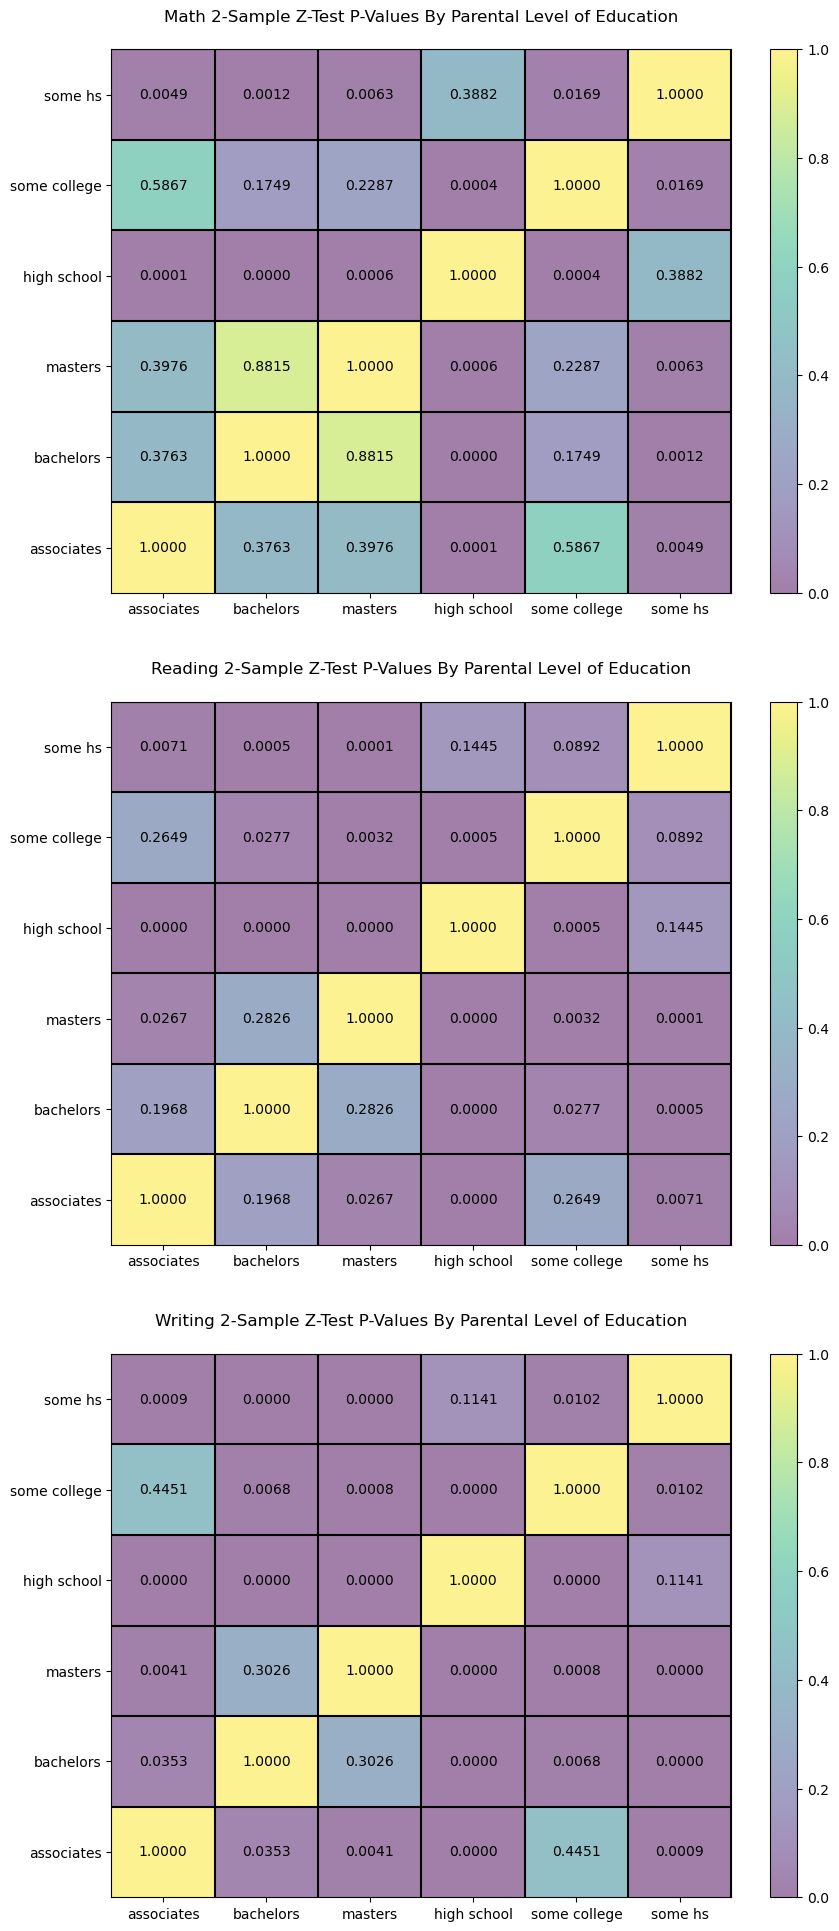

In [17]:
#creating a list of a the subjects  
subjects = ['Math','Reading','Writing']

#initializing the plotting figure 
fig, axs = plt.subplots(nrows=3,figsize=(10,24))

#iterating over the matrices
for i in range(3):
    
    #plotting a colormesh grid of the selected matrix 
    grid = axs[i].pcolormesh(scores_matrices[i],alpha=.5)

    #plotting a colorbar
    plt.colorbar(grid, ax=axs[i])

    #setting the x and y ticks to show what groups are being compared at each tile 
    axs[i].set_xticks(ticks=np.arange(.5,6,1),labels=['associates','bachelors','masters','high school','some college','some hs'])

    axs[i].set_yticks(ticks=np.arange(.5,6,1),labels=['associates','bachelors','masters','high school','some college','some hs'])

    #iterating over the x and y values in the grid
    for j in range(1,7):

        #using the vertical line and horizontal line functions to plot grid lines separating the tiles 
        axs[i].axhline(j,color='black')

        axs[i].axvline(j,color='black')
    
    #iterating over the y values corresponding the to number of rows in the matrix
    for y in range(scores_matrices[i].shape[0]):

        #iterating over the x values corresponding the to number of columns in the matrix
        for x in range(scores_matrices[i].shape[1]):

            #annotating the matrix to show the p-value on each tile
            axs[i].text(x + 0.5, y + 0.5, '%.4f' % scores_matrices[i][y, x], horizontalalignment='center', verticalalignment='center')
    
    #setting the title of each of the subplots 
    axs[i].set_title(f'{subjects[i]} 2-Sample Z-Test P-Values By Parental Level of Education',pad=20)
    
    plt.savefig('Education Matrix.png')

In [18]:
#finding the linear parameters of the male writing v. math regression line
associates_math_writing_parameters, _ = curve_fit(Linear,associates_math_scores,associates_writing_scores)

#finding the linear parameters of the male math v. reading regression line  
associates_reading_math_parameters, _ = curve_fit(Linear,associates_reading_scores,associates_math_scores)

#finding the linear parameters of the male reading v. writing regression line 
associates_writing_reading_parameters, _ = curve_fit(Linear,associates_writing_scores,associates_reading_scores)

#using the male writing v. math parameters with the linear model to find the expected male writing scores 
associates_expected_writing_scores = Linear(associates_math_scores,associates_math_writing_parameters[0],associates_math_writing_parameters[1])

#using the male math v. reading parameters with the linear model to find the expected male math scores 
associates_expected_math_scores = Linear(associates_reading_scores,associates_reading_math_parameters[0],associates_reading_math_parameters[1])

#using the male reading v. writing parameters with the linear model to find the expected male reading scores 
associates_expected_reading_scores = Linear(associates_writing_scores,associates_writing_reading_parameters[0],associates_writing_reading_parameters[1])

#finding the linear parameters of the female writing v. math regression line 
bachelors_math_writing_parameters, _ = curve_fit(Linear,bachelors_math_scores,bachelors_writing_scores)

#finding the linear parameters of the female math v. reading regression line 
bachelors_reading_math_parameters, _ = curve_fit(Linear,bachelors_reading_scores,bachelors_math_scores)

#finding the linear parameters of the female reading v. writing regression line 
bachelors_writing_reading_parameters, _ = curve_fit(Linear,bachelors_writing_scores,bachelors_reading_scores)

#using the female writing v. math parameters with the linear model to find the expected female writing scores 
bachelors_expected_writing_scores = Linear(bachelors_math_scores,bachelors_math_writing_parameters[0],bachelors_math_writing_parameters[1])

#using the female math v. reading parameters with the linear model to find the expected female math scores
bachelors_expected_math_scores = Linear(bachelors_reading_scores,bachelors_reading_math_parameters[0],bachelors_reading_math_parameters[1])

#using the female reading v. writing parameters with the linear model to find the expected female reading scores
bachelors_expected_reading_scores = Linear(bachelors_writing_scores,bachelors_writing_reading_parameters[0],bachelors_writing_reading_parameters[1])

#finding the linear parameters of the male writing v. math regression line
masters_math_writing_parameters, _ = curve_fit(Linear,masters_math_scores,masters_writing_scores)

#finding the linear parameters of the male math v. reading regression line  
masters_reading_math_parameters, _ = curve_fit(Linear,masters_reading_scores,masters_math_scores)

#finding the linear parameters of the male reading v. writing regression line 
masters_writing_reading_parameters, _ = curve_fit(Linear,masters_writing_scores,masters_reading_scores)

#using the male writing v. math parameters with the linear model to find the expected male writing scores 
masters_expected_writing_scores = Linear(masters_math_scores,masters_math_writing_parameters[0],masters_math_writing_parameters[1])

#using the male math v. reading parameters with the linear model to find the expected male math scores 
masters_expected_math_scores = Linear(masters_reading_scores,masters_reading_math_parameters[0],masters_reading_math_parameters[1])

#using the male reading v. writing parameters with the linear model to find the expected male reading scores 
masters_expected_reading_scores = Linear(masters_writing_scores,masters_writing_reading_parameters[0],masters_writing_reading_parameters[1])

#finding the linear parameters of the female writing v. math regression line 
highschool_math_writing_parameters, _ = curve_fit(Linear,highschool_math_scores,highschool_writing_scores)

#finding the linear parameters of the female math v. reading regression line 
highschool_reading_math_parameters, _ = curve_fit(Linear,highschool_reading_scores,highschool_math_scores)

#finding the linear parameters of the female reading v. writing regression line 
highschool_writing_reading_parameters, _ = curve_fit(Linear,highschool_writing_scores,highschool_reading_scores)

#using the female writing v. math parameters with the linear model to find the expected female writing scores 
highschool_expected_writing_scores = Linear(highschool_math_scores,highschool_math_writing_parameters[0],highschool_math_writing_parameters[1])

#using the female math v. reading parameters with the linear model to find the expected female math scores
highschool_expected_math_scores = Linear(highschool_reading_scores,highschool_reading_math_parameters[0],highschool_reading_math_parameters[1])

#using the female reading v. writing parameters with the linear model to find the expected female reading scores
highschool_expected_reading_scores = Linear(highschool_writing_scores,highschool_writing_reading_parameters[0],highschool_writing_reading_parameters[1])

#finding the linear parameters of the female writing v. math regression line 
somecollege_math_writing_parameters, _ = curve_fit(Linear,somecollege_math_scores,somecollege_writing_scores)

#finding the linear parameters of the female math v. reading regression line 
somecollege_reading_math_parameters, _ = curve_fit(Linear,somecollege_reading_scores,somecollege_math_scores)

#finding the linear parameters of the female reading v. writing regression line 
somecollege_writing_reading_parameters, _ = curve_fit(Linear,somecollege_writing_scores,somecollege_reading_scores)

#using the female writing v. math parameters with the linear model to find the expected female writing scores 
somecollege_expected_writing_scores = Linear(somecollege_math_scores,somecollege_math_writing_parameters[0],somecollege_math_writing_parameters[1])

#using the female math v. reading parameters with the linear model to find the expected female math scores
somecollege_expected_math_scores = Linear(somecollege_reading_scores,somecollege_reading_math_parameters[0],somecollege_reading_math_parameters[1])

#using the female reading v. writing parameters with the linear model to find the expected female reading scores
somecollege_expected_reading_scores = Linear(somecollege_writing_scores,somecollege_writing_reading_parameters[0],somecollege_writing_reading_parameters[1])

somehs_math_writing_parameters, _ = curve_fit(Linear,somehs_math_scores,somehs_writing_scores)

#finding the linear parameters of the female math v. reading regression line 
somehs_reading_math_parameters, _ = curve_fit(Linear,somehs_reading_scores,somehs_math_scores)

#finding the linear parameters of the female reading v. writing regression line 
somehs_writing_reading_parameters, _ = curve_fit(Linear,somehs_writing_scores,somehs_reading_scores)

#using the female writing v. math parameters with the linear model to find the expected female writing scores 
somehs_expected_writing_scores = Linear(somehs_math_scores,somehs_math_writing_parameters[0],somehs_math_writing_parameters[1])

#using the female math v. reading parameters with the linear model to find the expected female math scores
somehs_expected_math_scores = Linear(somehs_reading_scores,somehs_reading_math_parameters[0],somehs_reading_math_parameters[1])

#using the female reading v. writing parameters with the linear model to find the expected female reading scores
somehs_expected_reading_scores = Linear(somehs_writing_scores,somehs_writing_reading_parameters[0],somehs_writing_reading_parameters[1])

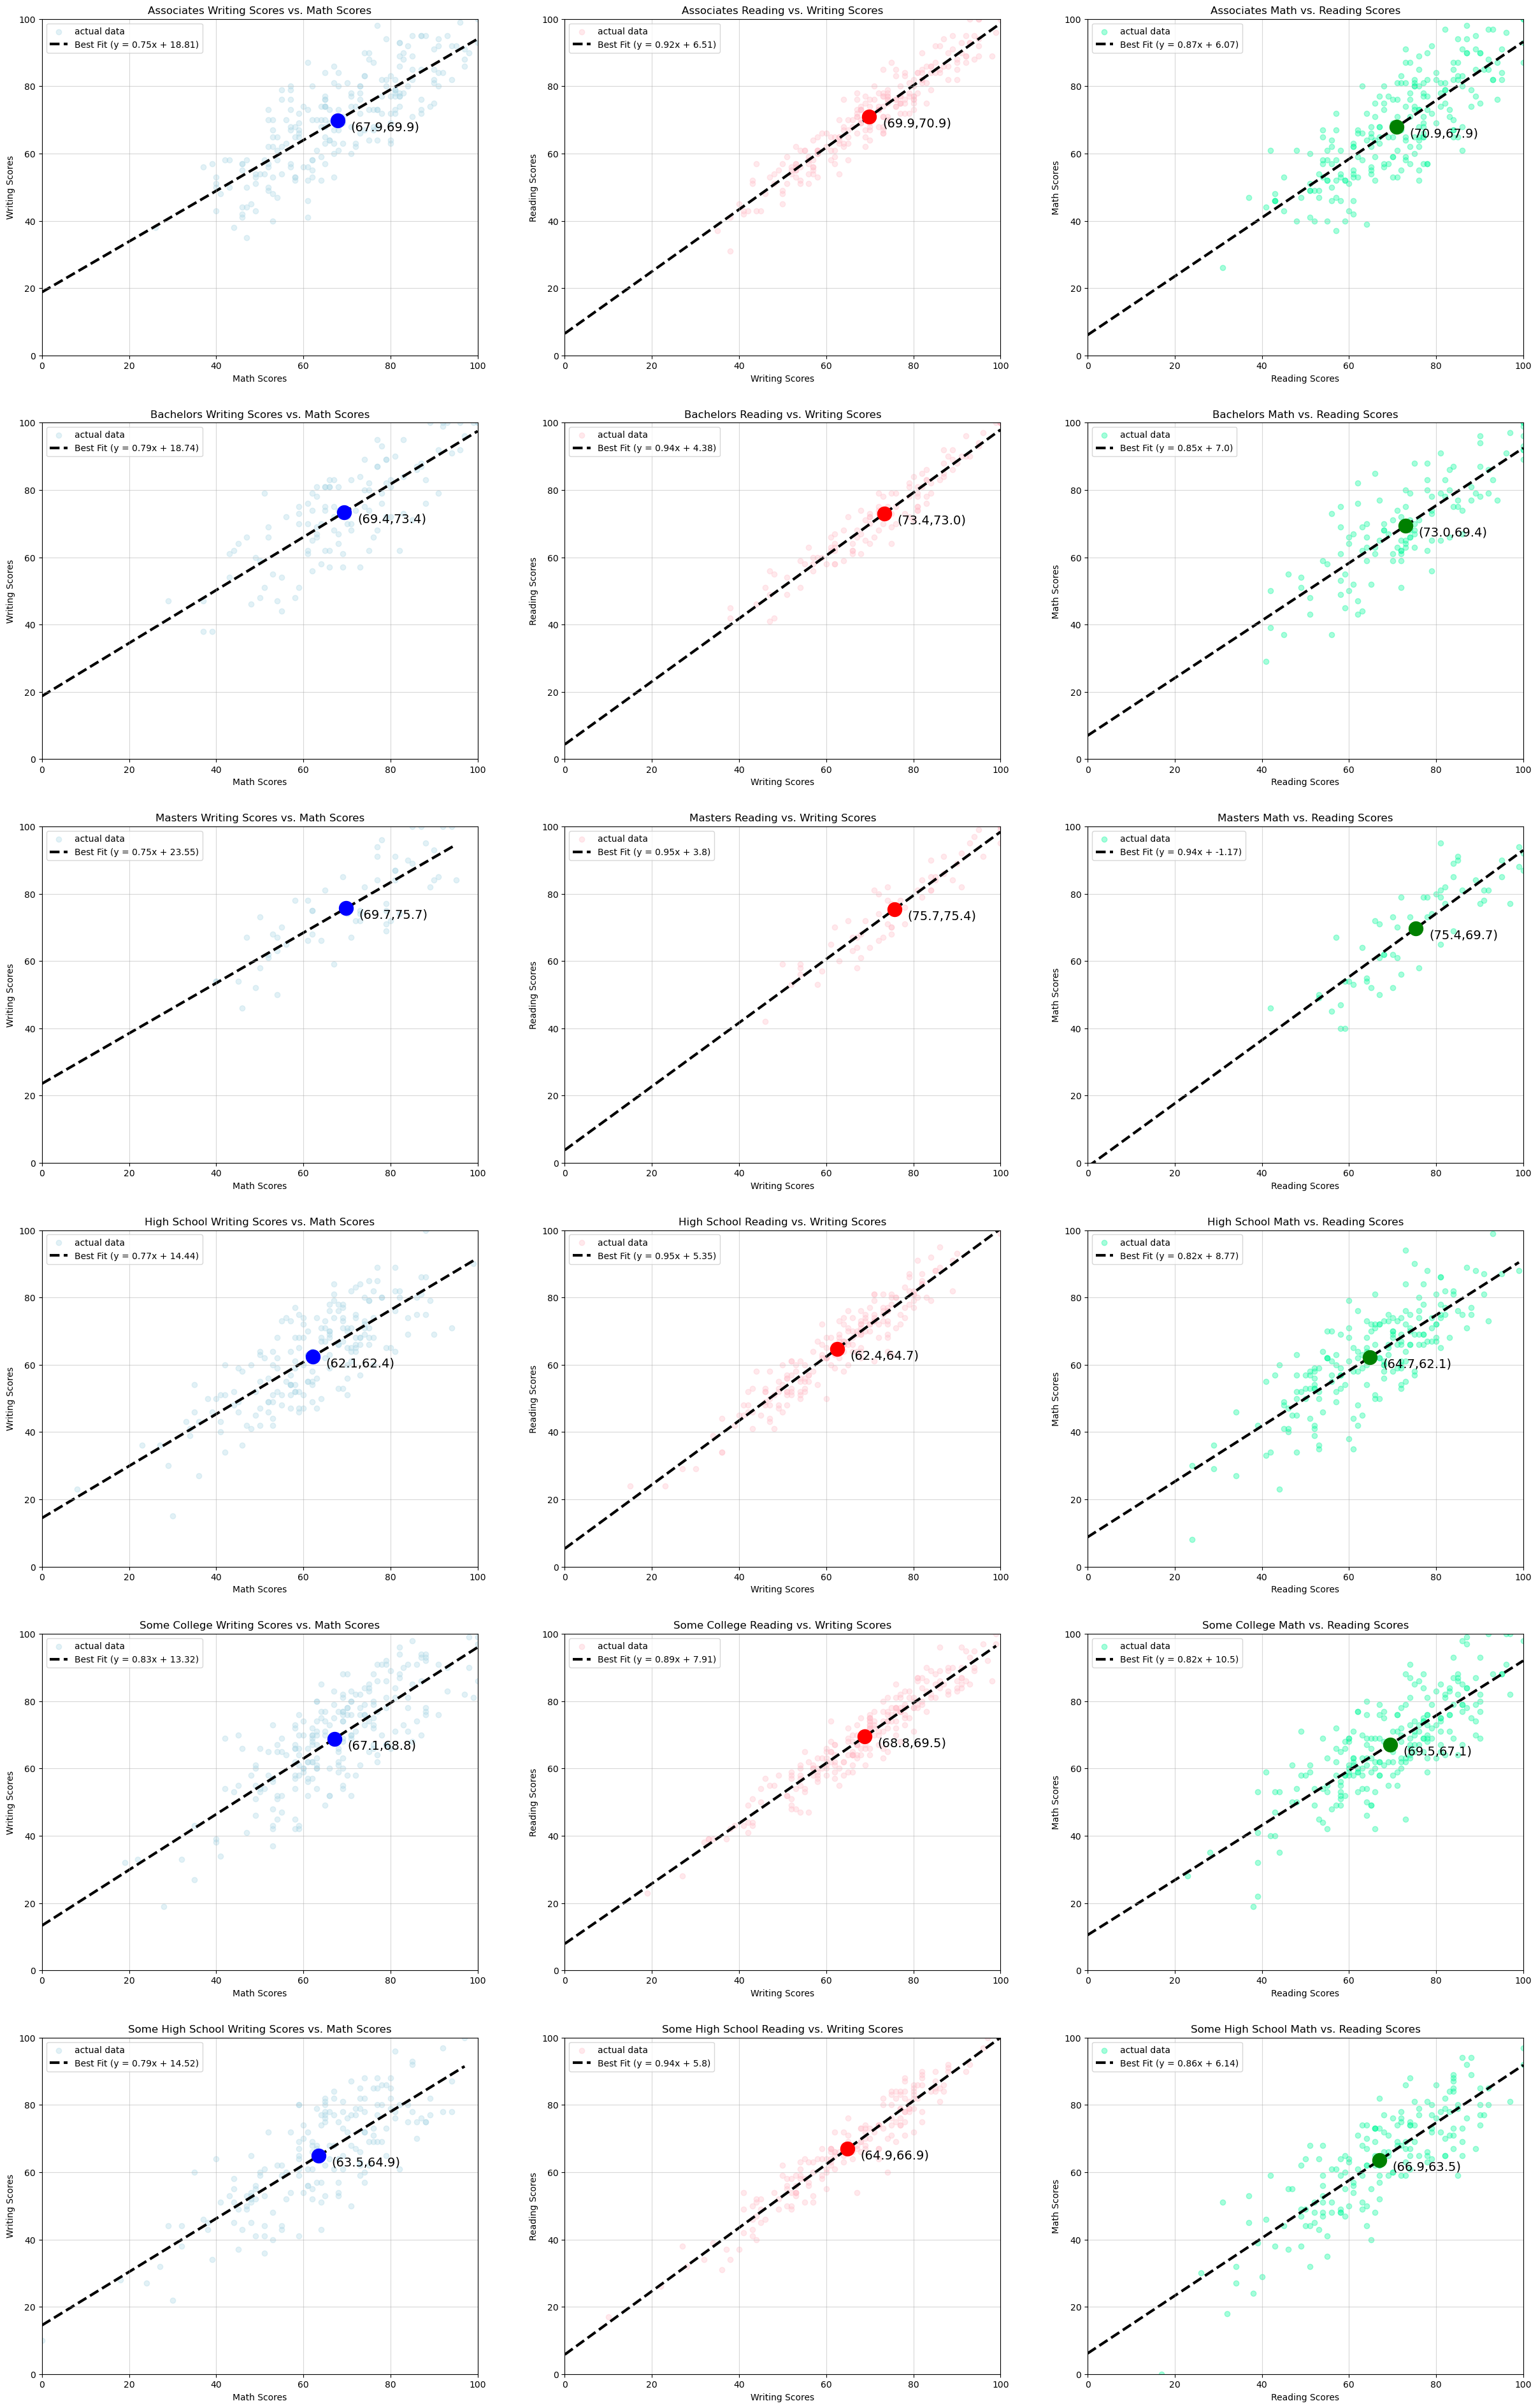

In [19]:
#initializng a 3x2 subplot figure for plotting the male and female regression lines
fig,axs = plt.subplots(nrows=6,ncols=3,figsize=(30,48))

#initializing a list of 3 sublists where each sublist contains the respective male and female x axis data for 
#each row of subplots
xs = [[associates_math_scores,associates_writing_scores,associates_reading_scores],[bachelors_math_scores,bachelors_writing_scores,bachelors_reading_scores],[masters_math_scores,masters_writing_scores,masters_reading_scores],[highschool_math_scores,highschool_writing_scores,highschool_reading_scores],[somecollege_math_scores,somecollege_writing_scores,somecollege_reading_scores],[somehs_math_scores,somehs_writing_scores,somehs_reading_scores]]

#initializing a list of 3 sublists where each sublist contains the respective male and female y axis data for 
#each row of the subplots
ys = [[associates_writing_scores,associates_reading_scores,associates_math_scores],[bachelors_writing_scores,bachelors_reading_scores,bachelors_math_scores],[masters_writing_scores,masters_reading_scores,masters_math_scores],[highschool_writing_scores,highschool_reading_scores,highschool_math_scores],[somecollege_writing_scores,somecollege_reading_scores,somecollege_math_scores],[somehs_writing_scores,somehs_reading_scores,somehs_math_scores]]

#initializing a list of 3 sublists where each sublist contians the respective male and female linear regression
#parameters for each row of the subplots 
para = [[associates_math_writing_parameters,associates_writing_reading_parameters,associates_reading_math_parameters],[bachelors_math_writing_parameters,bachelors_writing_reading_parameters,bachelors_reading_math_parameters],[masters_math_writing_parameters,masters_writing_reading_parameters,masters_reading_math_parameters],[highschool_math_writing_parameters,highschool_writing_reading_parameters,highschool_reading_math_parameters],[somecollege_math_writing_parameters,somecollege_writing_reading_parameters,somecollege_reading_math_parameters],[somehs_math_writing_parameters,somehs_writing_reading_parameters,somehs_reading_math_parameters]]

#initializing a list of 3 sublists where each sublist contains the respective male and female subplot title
#for each row of the subplots
titles = [['Associates Writing Scores vs. Math Scores','Associates Reading vs. Writing Scores','Associates Math vs. Reading Scores'],['Bachelors Writing Scores vs. Math Scores','Bachelors Reading vs. Writing Scores','Bachelors Math vs. Reading Scores'],['Masters Writing Scores vs. Math Scores','Masters Reading vs. Writing Scores','Masters Math vs. Reading Scores'],['High School Writing Scores vs. Math Scores','High School Reading vs. Writing Scores','High School Math vs. Reading Scores'],['Some College Writing Scores vs. Math Scores','Some College Reading vs. Writing Scores','Some College Math vs. Reading Scores'],['Some High School Writing Scores vs. Math Scores','Some High School Reading vs. Writing Scores','Some High School Math vs. Reading Scores']]

#initializng a list of 3 tuples where each tuples contains the axis labels for that row of subplots 
axs_labels = [('Math Scores','Writing Scores'),('Writing Scores','Reading Scores'),('Reading Scores','Math Scores')]

#initializing a list of 3 sublists where each sublist contains the respective male and female mean value scatter 
#color for each row of the subplots
colors = ['blue','red','green']

#initializing a list of 3 sublists where each sublist contains the respective male and female scatter point 
#color for each row of the subplots
scattercolors = ['lightblue','pink','mediumspringgreen']

#iterating over i = 0,1,2 where each i is a row of subplots
for i in range(6):
    
    #iterating over j = 0,1 where each j is a column of suplots 
    for j in range(3):
        
        #plotting the respective scatter plot for each of the 6 subplots using the already initialized lists
        axs[i,j].scatter(xs[i][j],ys[i][j],color=scattercolors[j],alpha=.35,label='actual data',zorder=-20)
        
        #plotting the respective linear regression line for each of the 6 subplots using the already
        #initialized lists
        axs[i,j].plot([0,max(xs[i][j])],[para[i][j][1],Linear(max(xs[i][j]),para[i][j][0],para[i][j][1])],color='black',
                      linewidth=3,linestyle='dashed',zorder=-10,label=f'Best Fit (y = {round(para[i][j][0],2)}x + {round(para[i][j][1],2)})')
        
        #plotting (x_mean, y_mean) for each of the 6 suplots using the already initialized lists 
        axs[i,j].scatter(np.mean(xs[i][j]),np.mean(ys[i][j]),marker='.',s=1000,color=colors[j],zorder=0)

        #adding an annotation including the values of the (x_mean,y_mean) coordinate for each of the 6 suplots
        axs[i,j].annotate(f'({round(np.mean(xs[i][j]),1)},{round(np.mean(ys[i][j]),1)})',xy=(np.mean(xs[i][j])+3,np.mean(ys[i][j])-3),fontsize=14)

        #setting the title of all 6 of the subplots using the titles list
        axs[i,j].set_title(titles[i][j])
            
        #setting the x axis label of all 6 of the subplots using the axs_labels list
        axs[i,j].set_xlabel(axs_labels[j][0]) 

        #setting the y axis label of all 6 of the subplots using the axs_labels list
        axs[i,j].set_ylabel(axs_labels[j][1]) 
           
        #setting a uniform x limit across all 6 of the subplots 
        axs[i,j].set_xlim(0,100)
    
        #setting a uniform y limit across all 6 of the subplots 
        axs[i,j].set_ylim(0,100)
    
        #initialzing a legend for each of the 6 subplots 
        axs[i,j].legend()
        
        #initializng a grid for each of the 6 subplots
        axs[i,j].grid(alpha=.5)

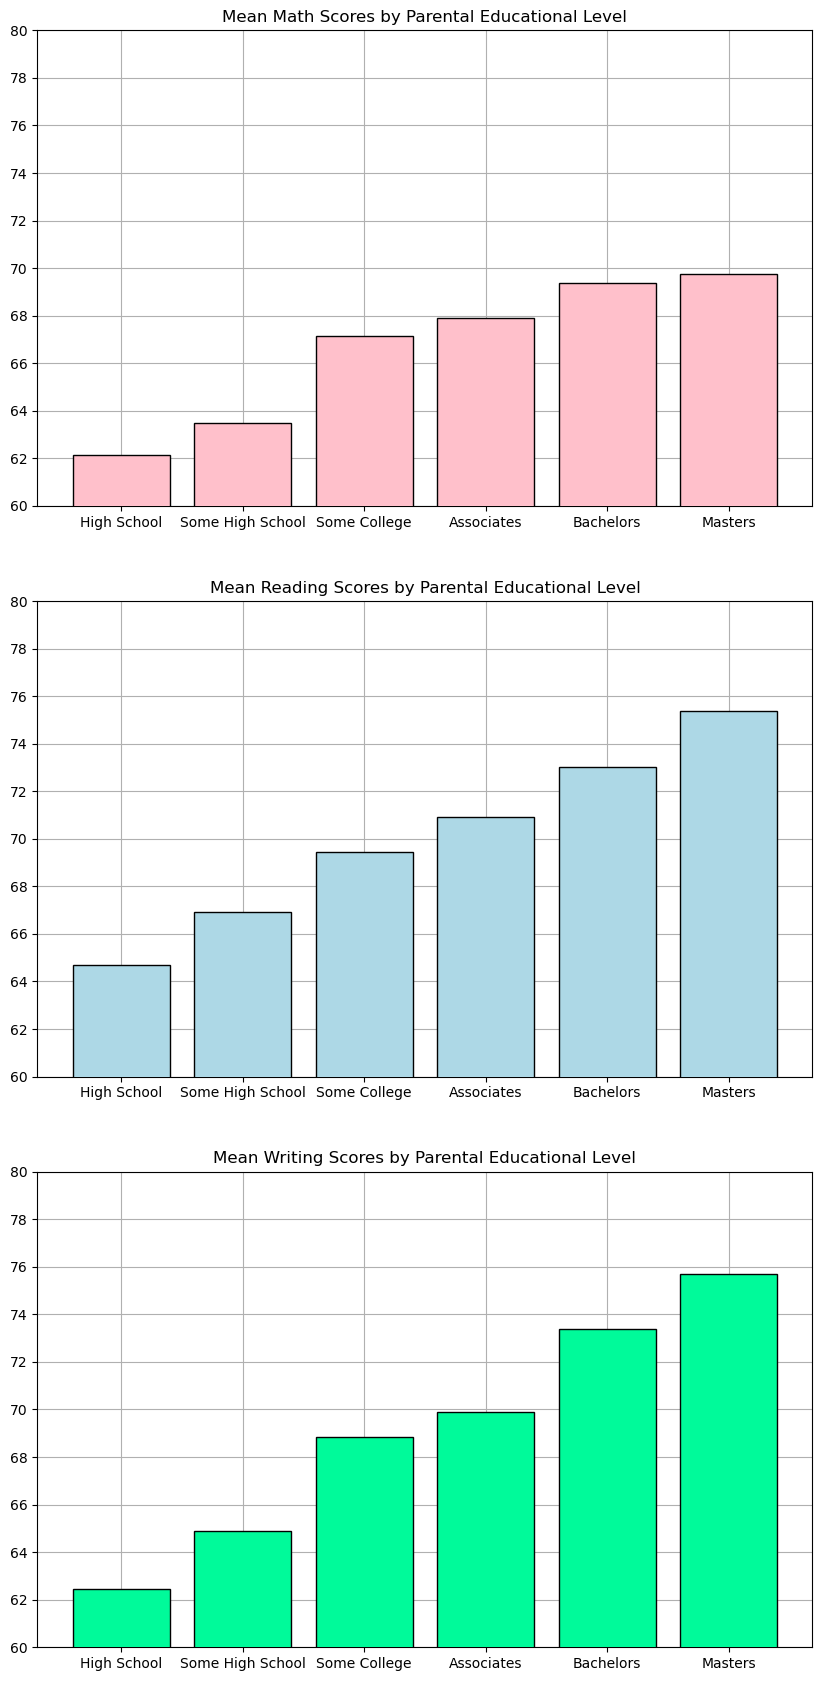

In [20]:
#creating a list that holds the mean score for each of the ethnicity groups for each of the subjects
math_heights = [np.mean(associates_math_scores),np.mean(bachelors_math_scores),np.mean(masters_math_scores),np.mean(highschool_math_scores),np.mean(somecollege_math_scores),np.mean(somehs_math_scores)]

reading_heights = [np.mean(associates_reading_scores),np.mean(bachelors_reading_scores),np.mean(masters_reading_scores),np.mean(highschool_reading_scores),np.mean(somecollege_reading_scores),np.mean(somehs_reading_scores)]

writing_heights = [np.mean(associates_writing_scores),np.mean(bachelors_writing_scores),np.mean(masters_writing_scores),np.mean(highschool_writing_scores),np.mean(somecollege_writing_scores),np.mean(somehs_writing_scores)]

math_heights.sort(); reading_heights.sort(); writing_heights.sort()

#creating a list holding the titles for each of the subplots 
titles = ['Mean Math Scores by Parental Educational Level','Mean Reading Scores by Parental Educational Level','Mean Writing Scores by Parental Educational Level']

#initializng the plot figure
fig,axs = plt.subplots(nrows=3,ncols=1,figsize=(10,21))

#plottig the bar graphs on each of subplots
axs[0].bar(range(6),math_heights,color='pink',edgecolor='black',zorder=20)

axs[1].bar(range(6),reading_heights,color='lightblue',edgecolor='black',zorder=20)

axs[2].bar(range(6),writing_heights,color='mediumspringgreen',edgecolor='black',zorder=20)

#iterating over the axes
for i in range(3):
    
    #setting the title of each of the subplots 
    axs[i].set_title(titles[i])
    
    #setting the x ticks to show the ethnicity group
    axs[i].set_xticks(ticks=range(6),labels=['High School', 'Some High School','Some College','Associates','Bachelors','Masters'])
    
    #setting the y ticks
    axs[i].set_yticks(ticks=[i for i in range(60,82,2)])
    
    #setting the y limit
    axs[i].set_ylim(60,80)
    
    #plotting the grid
    axs[i].grid()